# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. 

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
   
## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.


## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. 

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
driver = webdriver.Chrome()

url = "https://etherscan.io/txs"

driver.get(url)

In [11]:
def extract_html_content(driver):
    body = driver.find_element(By.TAG_NAME,"tbody")
    html_content=body.get_attribute("innerHTML")
    soup = BeautifulSoup(html_content, "html.parser")
    return soup.find_all("tr")

In [12]:
def extract_attributes(item):
    return {
            "txn Hash": item.find("span", class_="hash-tag").text.strip(),
            "Method": item.find("span", class_="badge").text.strip(),
            "Block": item.find_all("td")[3].text.strip(),
            "Age": item.find("td", class_="showAge").text.strip(),
            "Sender": item.find_all("td")[7].text.strip(),
            "Receiver": item.find_all("td")[9].text.strip(),
            "Value": item.find_all("td")[10].text.strip(),
            "Txn Fee": item.find_all("td", class_="small text-muted showTxnFee")[0].text.strip()
    }

In [13]:
all_data = []
page_number=0
while(page_number<50):
    tr=extract_html_content(driver)
    for item in tr:    
        all_data.append(extract_attributes(item))
    next_page = driver.find_element(By.XPATH, '//a[@class="page-link px-3" and @aria-label="Next"]')  
    next_page.click()
    page_number+=1

df = pd.DataFrame(all_data)
driver.close()


In [15]:
first_10_blocks = df["Block"].drop_duplicates().head(10)
filtered_df = df[df["Block"].isin(first_10_blocks)].drop_duplicates(subset="txn Hash", keep="first")
filtered_df.describe()

,txn Hash,Method,Block,Age,Sender,Receiver,Value,Txn Fee
count,1290,1290,1290,1290,1290,1290,1290,1290
unique,1290,136,10,13,992,672,549,941
top,0xcd4c89643c6dd574807b759363e3ab5400d8516dc62a...,Transfer,19399379,1 min ago,Crypto.com 2,Uniswap: Universal Router,0 ETH,0.00157271
freq,1,736,202,379,28,147,627,23


In [16]:
backup_df = filtered_df.copy(deep=True)
filtered_df.dtypes

txn Hash    object
Method      object
Block       object
Age         object
Sender      object
Receiver    object
Value       object
Txn Fee     object
dtype: object

## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

In [17]:
def print_unique_elements(df, column_name):
    try:
        unique_counts = df[column_name].value_counts()
        i = 0 
        for value, count in unique_counts.items():
            i = i + 1 
            print(f"{i} : {value} Count: {count}")
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")

In [18]:
print_unique_elements(filtered_df,"Block")

1 : 19399379 Count: 202
2 : 19399381 Count: 187
3 : 19399377 Count: 170
4 : 19399374 Count: 149
5 : 19399378 Count: 144
6 : 19399375 Count: 133
7 : 19399380 Count: 114
8 : 19399376 Count: 71
9 : 19399382 Count: 64
10 : 19399373 Count: 56


In [20]:
filtered_df["Txn Fee"] = filtered_df["Txn Fee"].astype(float)
filtered_df.dropna(inplace = True , subset = ["Txn Fee"])
print_unique_elements(filtered_df,"Txn Fee")

1 : 0.00157271 Count: 23
2 : 0.00151765 Count: 21
3 : 0.00136076 Count: 20
4 : 0.00154492 Count: 18
5 : 0.00144835 Count: 17
6 : 0.00153073 Count: 14
7 : 0.00148474 Count: 13
8 : 0.00156188 Count: 12
9 : 0.00152084 Count: 11
10 : 0.001554 Count: 10
11 : 0.00174279 Count: 9
12 : 0.00154088 Count: 9
13 : 0.00153037 Count: 9
14 : 0.00215296 Count: 8
15 : 0.00146933 Count: 8
16 : 0.00157728 Count: 8
17 : 0.00165177 Count: 7
18 : 0.00147318 Count: 7
19 : 0.0014976 Count: 7
20 : 0.00149038 Count: 6
21 : 0.00144929 Count: 6
22 : 0.00167277 Count: 6
23 : 0.00152511 Count: 6
24 : 0.0021521 Count: 6
25 : 0.00149033 Count: 6
26 : 0.00153859 Count: 6
27 : 0.00153272 Count: 6
28 : 0.00169142 Count: 5
29 : 0.00151392 Count: 5
30 : 0.00155863 Count: 5
31 : 0.00148838 Count: 4
32 : 0.00301038 Count: 4
33 : 0.00148513 Count: 4
34 : 0.00215383 Count: 4
35 : 0.00157963 Count: 4
36 : 0.0016838 Count: 4
37 : 0.00148839 Count: 4
38 : 0.00173577 Count: 3
39 : 0.001533 Count: 3
40 : 0.00148999 Count: 3
41 : 0

In [21]:
print_unique_elements(filtered_df,"Value")

1 : 0 ETH Count: 627
2 : 1 ETH Count: 16
3 : 0.1 ETH Count: 12
4 : 0.05 ETH Count: 11
5 : 0.03 ETH Count: 8
6 : 0.08 ETH Count: 8
7 : 0.5 ETH Count: 6
8 : 0.2 ETH Count: 5
9 : 0.3 ETH Count: 5
10 : 0.00528 ETH Count: 5
11 : 0.01 ETH Count: 4
12 : 0.4 ETH Count: 4
13 : 0.07 ETH Count: 3
14 : 0.52 ETH Count: 3
15 : 0.11 ETH Count: 3
16 : 0.008 ETH Count: 3
17 : 0.02 ETH Count: 3
18 : 4 ETH Count: 3
19 : 0.009 ETH Count: 3
20 : 0.13 ETH Count: 3
21 : 0.25 ETH Count: 2
22 : 0.007 ETH Count: 2
23 : 0.09 ETH Count: 2
24 : 2.5 ETH Count: 2
25 : 0.29 ETH Count: 2
26 : 0.067 ETH Count: 2
27 : 0.065 ETH Count: 2
28 : 0.021 ETH Count: 2
29 : 0.26 ETH Count: 2
30 : 0.00769 ETH Count: 2
31 : 0.2975 ETH Count: 2
32 : 0.9 ETH Count: 2
33 : 0.35 ETH Count: 2
34 : 0.8 ETH Count: 2
35 : 0.038484876 ETH Count: 2
36 : 0.15 ETH Count: 2
37 : 209 wei Count: 2
38 : 0.513131681 ETH Count: 2
39 : 0.025 ETH Count: 2
40 : 0.003740892 ETH Count: 2
41 : 2 ETH Count: 2
42 : 0.058 ETH Count: 2
43 : 0.061897 ETH Coun

In [22]:
def convert_to_eth(value):
    try:
        if "wei" in value:
            wei_value = float(value.replace(" wei", ""))
            eth_value = wei_value / 1e18 
        else:
            eth_value = float(value.replace(" ETH", ""))
        return eth_value
    except ValueError:
        return np.nan

filtered_df['Value'] = filtered_df['Value'].apply(convert_to_eth)
filtered_df = filtered_df[filtered_df['Value'] != 0]
filtered_df.dropna(inplace = True , subset = ["Value"])
print_unique_elements(filtered_df,"Value")

1 : 1.0 Count: 16
2 : 0.1 Count: 12
3 : 0.05 Count: 11
4 : 0.08 Count: 8
5 : 0.03 Count: 8
6 : 0.5 Count: 6
7 : 0.2 Count: 5
8 : 0.3 Count: 5
9 : 0.00528 Count: 5
10 : 0.4 Count: 4
11 : 0.01 Count: 4
12 : 0.009 Count: 3
13 : 0.02 Count: 3
14 : 0.11 Count: 3
15 : 0.07 Count: 3
16 : 0.13 Count: 3
17 : 0.52 Count: 3
18 : 4.0 Count: 3
19 : 0.008 Count: 3
20 : 0.09 Count: 2
21 : 0.00769 Count: 2
22 : 2.5 Count: 2
23 : 0.021 Count: 2
24 : 0.29 Count: 2
25 : 0.067 Count: 2
26 : 0.065 Count: 2
27 : 0.26 Count: 2
28 : 0.007 Count: 2
29 : 0.8 Count: 2
30 : 0.003740892 Count: 2
31 : 0.35 Count: 2
32 : 0.038484876 Count: 2
33 : 0.15 Count: 2
34 : 2.09e-16 Count: 2
35 : 0.2975 Count: 2
36 : 0.513131681 Count: 2
37 : 0.9 Count: 2
38 : 0.25 Count: 2
39 : 0.025 Count: 2
40 : 2.0 Count: 2
41 : 0.015 Count: 2
42 : 0.058 Count: 2
43 : 0.011 Count: 2
44 : 0.061897 Count: 2
45 : 0.0256 Count: 2
46 : 2.35 Count: 1
47 : 0.715743688 Count: 1
48 : 0.12828292 Count: 1
49 : 2.895119177 Count: 1
50 : 0.046698012 

In [23]:
Q1 = filtered_df['Value'].quantile(0.25)
Q3 = filtered_df['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers = filtered_df[(filtered_df['Value'] < lower_threshold) | (filtered_df['Value'] > upper_threshold)]

filtered_df = filtered_df.drop(outliers.index)

filtered_df.reset_index(drop=True, inplace=True)



In [24]:
def calculate_mean_and_std(df, column_name):
    try:
        column_mean = df[column_name].mean()
        column_std = df[column_name].std()
        return column_mean, column_std
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return np.nan, np.nan

In [25]:
mean_value, std_value = calculate_mean_and_std(filtered_df, "Value")
mean_fee, std_fee = calculate_mean_and_std(filtered_df, "Txn Fee")
print(f"Value mean = {mean_value} \nValue std = {std_value} \nfee mean = {mean_fee} \nfee std = {std_fee}")

Value mean = 0.11410004378268551 
Value std = 0.15212787432339106 
fee mean = 0.004600589187279153 
fee std = 0.007331711812179358


In [28]:
from scipy.stats import norm

def plot_histogram_and_kde(df, column_name , bins_count):
    try:
        
        df[column_name].plot(kind='hist', bins=bins_count, density=True, alpha=0.5, label='Histogram')
        mean_value = df[column_name].mean()
        std_value = df[column_name].std()

        x_values = np.linspace(df[column_name].min(),df[column_name].max(), 1000)
        y_values = norm.pdf(x_values, mean_value, std_value)

        plt.plot(x_values, y_values, color='red', label='Gaussian KDE')

        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Density", fontsize=12)
        plt.title(f"Distribution of {column_name} with Gaussian KDE", fontsize=14)
        plt.legend()  
        plt.show()
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        
def plot_box_plot(df, column_name):
    try:
        sns.boxplot(x=df[column_name], color='lightgreen')
        plt.xlabel(column_name)
        plt.title(f"Box Plot: {column_name}")
        plt.show()
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        
def plot_scatter(df, x_column, y_column):
    try:
        plt.scatter(df[x_column], df[y_column], alpha=0.5, color='purple')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f"Scatter Plot: {x_column} vs. {y_column}")
        plt.show()
    except KeyError:
        print(f"Column '{x_column}' or '{y_column}' not found in the DataFrame.")
        
def plot_violin(df , column_name):
    plt.violinplot(dataset=df[column_name], vert=False)
    plt.title(f"{column_name} violinplot")
    plt.show()

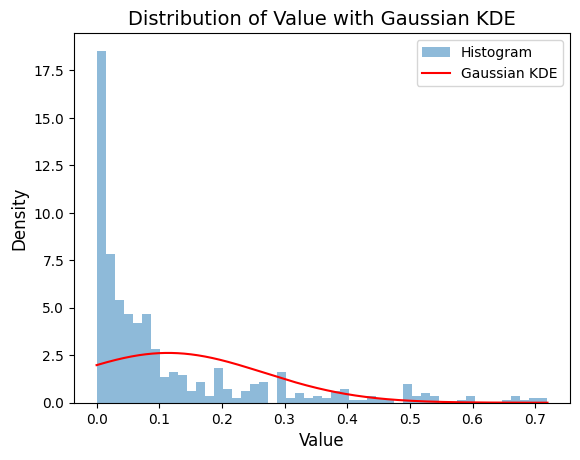

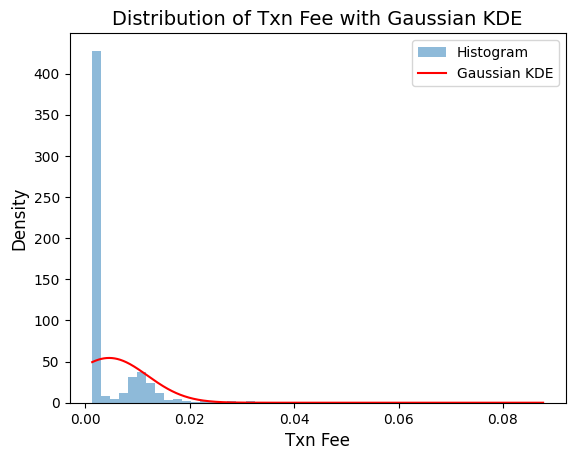

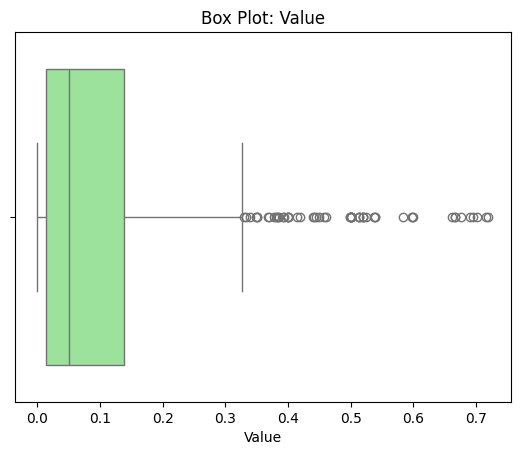

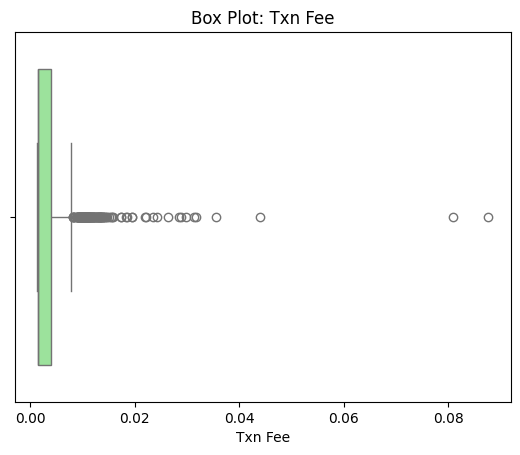

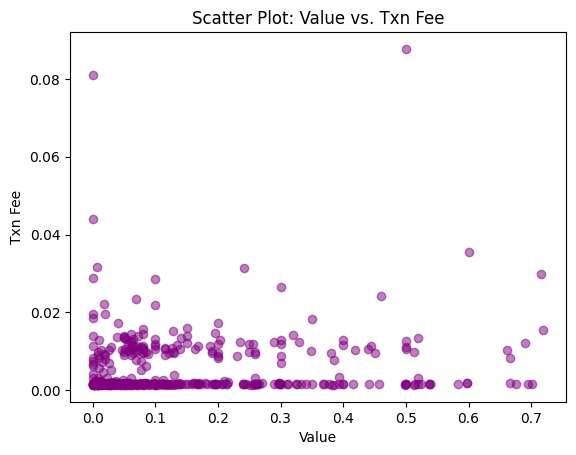

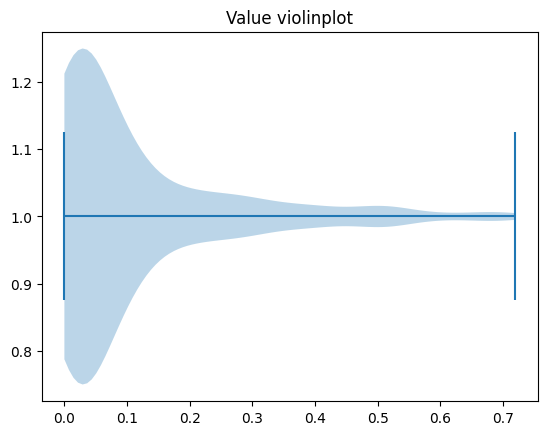

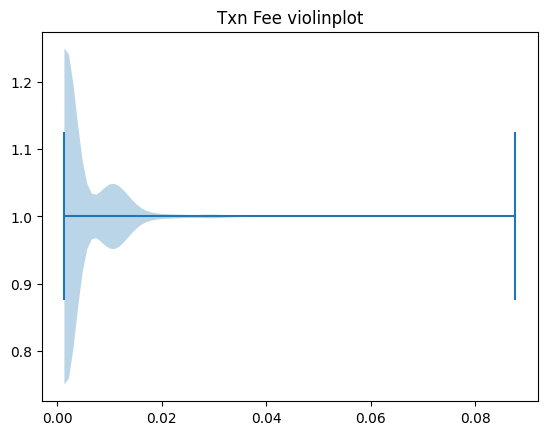

In [29]:
plot_histogram_and_kde(filtered_df , "Value" , 50)
plot_histogram_and_kde(filtered_df , "Txn Fee" , 50)
plot_box_plot(filtered_df , "Value")
plot_box_plot(filtered_df , "Txn Fee")
plot_scatter(filtered_df , "Value" , "Txn Fee")
plot_violin(filtered_df , "Value" )
plot_violin(filtered_df , "Txn Fee" )

## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

- **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
- **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.

In [1]:
# Your code here